<a href="https://www.kaggle.com/code/adeylol/helmet-detection-using-yolov8?scriptVersionId=223559493" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Install Ultralytics
!pip install -q ultralytics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 921.5/921.5 kB 22.5 MB/s eta 0:00:00


In [2]:
# Import necessary libraries
import os
import shutil
import yaml
import glob
from xml.dom import minidom
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ‚úÖ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# ==========================
# üìå Step 1: YAML File Setup
# ==========================
yaml_path = "/kaggle/working/dataset.yaml"

data = {
    "train": "/kaggle/working/images",
    "val": "/kaggle/working/images",
    "test": "/kaggle/working/images",
    "nc": 2,
    "names": ["Without Helmet", "With Helmet"]
}

# Write dataset.yaml
with open(yaml_path, "w") as f:
    yaml.dump(data, f, default_flow_style=False)

print("‚úÖ dataset.yaml created successfully!")

‚úÖ dataset.yaml created successfully!


In [4]:
# ==========================
# üìå Step 2: Prepare Directory Structure
# ==========================
label_dir = "/kaggle/working/labels"

# Remove old labels folder and create a new one
if os.path.exists(label_dir):
    shutil.rmtree(label_dir)
os.makedirs(label_dir, exist_ok=True)
print(f"‚úÖ Created clean label directory: {label_dir}")

# Copy images from dataset
!cp -r /kaggle/input/helmet-detection/images/ /kaggle/working/

‚úÖ Created clean label directory: /kaggle/working/labels


In [5]:
# ==========================
# üìå Step 3: Convert XML Annotations to YOLO Format
# ==========================
lut = {"Without Helmet": 0, "With Helmet": 1}  # Class lookup table

def get_text(tag, parent):
    """Helper function to extract text from an XML tag."""
    return parent.getElementsByTagName(tag)[0].firstChild.data

def convert_coordinates(size, box):
    """Convert Pascal VOC bounding box format to YOLO format."""
    dw, dh = 1.0 / size[0], 1.0 / size[1]
    x = (box[0] + box[1]) / 2.0 * dw
    y = (box[2] + box[3]) / 2.0 * dh
    w = (box[1] - box[0]) * dw
    h = (box[3] - box[2]) * dh
    return x, y, w, h

def convert_xml2yolo(lut, input_folder, output_folder):
    """Converts all XML annotations in input_folder to YOLO format."""
    for fname in glob.glob(os.path.join(input_folder, "*.xml")):
        xmldoc = minidom.parse(fname)
        size = xmldoc.getElementsByTagName("size")[0]
        
        width, height = int(get_text("width", size)), int(get_text("height", size))
        fname_out = os.path.join(output_folder, os.path.basename(fname).replace(".xml", ".txt"))

        with open(fname_out, "w") as f:
            for item in xmldoc.getElementsByTagName("object"):
                class_name = get_text("name", item)
                if class_name not in lut:
                    print(f"‚ö†Ô∏è Warning: Unknown label '{class_name}' in {fname}. Skipping.")
                    continue

                # Bounding box extraction
                bbox = item.getElementsByTagName("bndbox")[0]
                xmin, xmax = float(get_text("xmin", bbox)), float(get_text("xmax", bbox))
                ymin, ymax = float(get_text("ymin", bbox)), float(get_text("ymax", bbox))
                
                bb = convert_coordinates((width, height), (xmin, xmax, ymin, ymax))
                f.write(f"{lut[class_name]} " + " ".join(f"{x:.6f}" for x in bb) + "\n")

        print(f"‚úÖ Converted: {fname_out}")

# Convert XML files to YOLO format
convert_xml2yolo(lut, "/kaggle/input/helmet-detection/annotations", "/kaggle/working/labels")

‚úÖ Converted: /kaggle/working/labels/BikesHelmets338.txt
‚úÖ Converted: /kaggle/working/labels/BikesHelmets680.txt
‚úÖ Converted: /kaggle/working/labels/BikesHelmets62.txt
‚úÖ Converted: /kaggle/working/labels/BikesHelmets172.txt
‚úÖ Converted: /kaggle/working/labels/BikesHelmets622.txt
‚úÖ Converted: /kaggle/working/labels/BikesHelmets477.txt
‚úÖ Converted: /kaggle/working/labels/BikesHelmets488.txt
‚úÖ Converted: /kaggle/working/labels/BikesHelmets696.txt
‚úÖ Converted: /kaggle/working/labels/BikesHelmets71.txt
‚úÖ Converted: /kaggle/working/labels/BikesHelmets269.txt
‚úÖ Converted: /kaggle/working/labels/BikesHelmets206.txt
‚úÖ Converted: /kaggle/working/labels/BikesHelmets705.txt
‚úÖ Converted: /kaggle/working/labels/BikesHelmets515.txt
‚úÖ Converted: /kaggle/working/labels/BikesHelmets113.txt
‚úÖ Converted: /kaggle/working/labels/BikesHelmets546.txt
‚úÖ Converted: /kaggle/working/labels/BikesHelmets632.txt
‚úÖ Converted: /kaggle/working/labels/BikesHelmets267.txt
‚úÖ Converted: /

In [6]:
# ==========================
# üìå Step 4: Load and Train YOLO Model
# ==========================
model = YOLO("yolov8n.pt")  # Load pretrained YOLOv8 model

# Train the model
results = model.train(data=yaml_path, epochs=30)
print("‚úÖ Training complete!")

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 6.25M/6.25M [00:00<00:00, 121MB/s]


Ultralytics 8.3.78 üöÄ Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/dataset.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 755k/755k [00:00<00:00, 4.47MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 5.35M/5.35M [00:00<00:00, 120MB/s]


AMP: checks passed ‚úÖ


train: Scanning /kaggle/working/labels... 764 images, 3 backgrounds, 15 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 764/764 [00:01<00:00, 450.83it/s]

train: WARNING ‚ö†Ô∏è /kaggle/working/images/BikesHelmets103.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     408.72      81.502      71.037      83.004]
train: WARNING ‚ö†Ô∏è /kaggle/working/images/BikesHelmets140.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     547.68        84.5      132.16         151]
train: WARNING ‚ö†Ô∏è /kaggle/working/images/BikesHelmets205.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      263.5          43          85          74]
train: WARNING ‚ö†Ô∏è /kaggle/working/images/BikesHelmets279.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      194.5          56         103         100]
train: WARNING ‚ö†Ô∏è /kaggle/working/images/BikesHelmets326.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        157        56.5          86          97]
train: WARNING ‚ö†Ô∏è /kaggle/working/images/Bikes

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/working/labels.cache... 764 images, 3 backgrounds, 15 corrupt: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 764/764 [00:00<?, ?it/s]

train: WARNING ‚ö†Ô∏è /kaggle/working/images/BikesHelmets103.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     408.72      81.502      71.037      83.004]
train: WARNING ‚ö†Ô∏è /kaggle/working/images/BikesHelmets140.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     547.68        84.5      132.16         151]
train: WARNING ‚ö†Ô∏è /kaggle/working/images/BikesHelmets205.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      263.5          43          85          74]
train: WARNING ‚ö†Ô∏è /kaggle/working/images/BikesHelmets279.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      194.5          56         103         100]
train: WARNING ‚ö†Ô∏è /kaggle/working/images/BikesHelmets326.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [        157        56.5          86          97]
train: WARNING ‚ö†Ô∏è /kaggle/working/images/Bikes

Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ‚úÖ
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.18G       1.52      2.655      1.225         60        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:11<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:07<00:00,  3.39it/s]


                   all        749       1411    0.00528      0.847      0.353      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.17G      1.419      1.661      1.169         59        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:05<00:00,  4.25it/s]


                   all        749       1411      0.793      0.602      0.708      0.418

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.16G      1.397      1.551      1.163         56        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:05<00:00,  4.43it/s]


                   all        749       1411      0.615      0.649      0.669      0.382

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.16G      1.424      1.486      1.161         35        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:05<00:00,  4.65it/s]


                   all        749       1411      0.597      0.693      0.656      0.359

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.16G       1.35      1.334      1.146         43        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:05<00:00,  4.50it/s]


                   all        749       1411      0.734      0.788       0.81      0.491

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.16G       1.36      1.216      1.153         36        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.90it/s]


                   all        749       1411      0.714      0.794        0.8      0.487

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.16G      1.354       1.15      1.142         56        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:08<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:05<00:00,  4.51it/s]


                   all        749       1411      0.713       0.73      0.783      0.479

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.16G      1.317      1.099      1.138         50        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:08<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  5.00it/s]

                   all        749       1411      0.778      0.797       0.83      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.16G      1.324      1.085       1.14         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:08<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:05<00:00,  4.50it/s]


                   all        749       1411      0.802      0.812      0.862      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.16G      1.286      1.002       1.12         57        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.91it/s]

                   all        749       1411      0.791      0.798      0.852      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.16G        1.3     0.9819      1.123         56        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:08<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.93it/s]

                   all        749       1411        0.8       0.87      0.881      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.16G      1.286     0.9688      1.124         41        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.96it/s]

                   all        749       1411      0.803      0.862       0.89      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.16G      1.259     0.9074      1.092         48        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.86it/s]

                   all        749       1411      0.782      0.843      0.869      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.16G      1.263     0.9064        1.1         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.99it/s]

                   all        749       1411      0.834      0.876      0.899      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.16G      1.236     0.8786      1.099         52        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.98it/s]

                   all        749       1411      0.825       0.86      0.883      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.16G       1.25     0.8719      1.087         34        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  5.02it/s]

                   all        749       1411      0.845      0.879      0.908      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.16G      1.215     0.8357      1.089         66        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:08<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.94it/s]

                   all        749       1411       0.85      0.878      0.922      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.16G      1.221     0.7934      1.095         39        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:05<00:00,  4.78it/s]

                   all        749       1411      0.835      0.907      0.932      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.16G      1.206     0.7967      1.068         54        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.89it/s]

                   all        749       1411       0.84      0.887      0.926      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.16G      1.207     0.7822      1.078         43        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:05<00:00,  4.62it/s]

                   all        749       1411      0.852      0.892       0.93       0.62


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.16G      1.208     0.7607      1.093         20        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:10<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.96it/s]

                   all        749       1411       0.85       0.89      0.908      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.16G      1.158     0.7121      1.074         26        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:08<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:05<00:00,  4.60it/s]

                   all        749       1411      0.887      0.891      0.939      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.16G      1.133      0.684       1.07         31        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:08<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.99it/s]

                   all        749       1411      0.865      0.911      0.938      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.16G      1.146     0.6823      1.072         18        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:08<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.92it/s]

                   all        749       1411      0.879      0.929      0.945      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.16G      1.105     0.6548      1.061         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.96it/s]

                   all        749       1411      0.899      0.918      0.953      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.16G       1.11     0.6485      1.053         26        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:08<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.95it/s]

                   all        749       1411      0.879      0.924      0.952      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.16G      1.093     0.6233      1.044         21        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.98it/s]

                   all        749       1411      0.908      0.933      0.958      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.16G      1.062      0.609      1.032         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:08<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.89it/s]

                   all        749       1411      0.904      0.934      0.963      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.16G      1.065     0.5866      1.037         29        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:09<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  5.00it/s]

                   all        749       1411      0.915      0.933      0.967      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.16G      1.058     0.5818      1.036         19        640: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 47/47 [00:08<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:04<00:00,  4.95it/s]

                   all        749       1411      0.924      0.932      0.968        0.7



30 epochs completed in 0.127 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.78 üöÄ Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 24/24 [00:05<00:00,  4.14it/s]


                   all        749       1411      0.924      0.934      0.968        0.7
        Without Helmet        257        472      0.912      0.911      0.956       0.66
           With Helmet        542        939      0.935      0.957      0.981      0.741


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.5ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs/detect/train
‚úÖ Training complete!



image 1/1 /kaggle/input/helmet-detection/images/BikesHelmets719.png: 608x640 1 With Helmet, 32.7ms
Speed: 3.7ms preprocess, 32.7ms inference, 1.3ms postprocess per image at shape (1, 3, 608, 640)


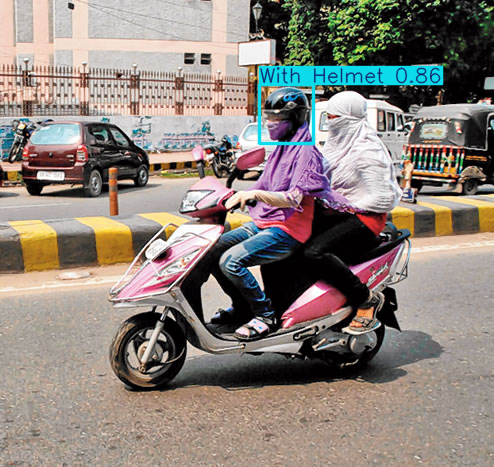

‚úÖ Processed /kaggle/input/helmet-detection/images/BikesHelmets719.png

image 1/1 /kaggle/input/helmet-detection/images/BikesHelmets219.png: 448x640 4 With Helmets, 32.6ms
Speed: 1.6ms preprocess, 32.6ms inference, 1.2ms postprocess per image at shape (1, 3, 448, 640)


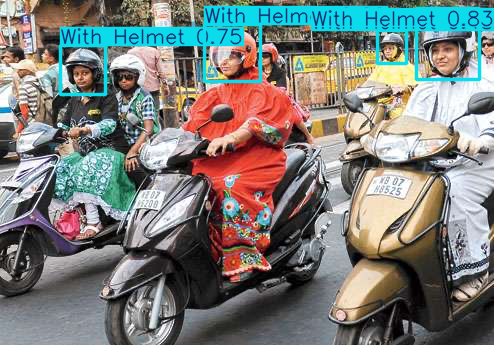

‚úÖ Processed /kaggle/input/helmet-detection/images/BikesHelmets219.png

image 1/1 /kaggle/input/helmet-detection/images/BikesHelmets18.png: 384x640 1 With Helmet, 33.3ms
Speed: 1.3ms preprocess, 33.3ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


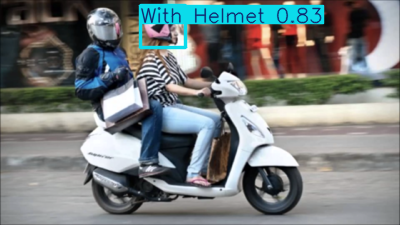

‚úÖ Processed /kaggle/input/helmet-detection/images/BikesHelmets18.png


In [7]:
# ==========================
# üìå Step 5: Run Inference on Test Images
# ==========================
test_images = glob.glob("/kaggle/input/helmet-detection/images/*.png")

for img_path in test_images[:3]:  # Limit to 3 images for quick testing
    results = model(img_path)
    for result in results:
        result.show()  # Display image
        result.save(filename=f"result_{os.path.basename(img_path)}")
    print(f"‚úÖ Processed {img_path}")

In [8]:
# ==========================
# üìå Step 6: Export Model to ONNX
# ==========================
if model.export(format="onnx"):
    print("‚úÖ Model exported to ONNX format successfully!")

Ultralytics 8.3.78 üöÄ Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (5.9 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 142.9/142.9 kB 10.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 291.5/291.5 MB 196.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 46.0/46.0 kB 242.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 86.8/86.8 kB 157.2 MB/s eta 0:00:00

requirements: AutoUpdate s